# **Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import download


In [ ]:
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import download
from sklearn.base import BaseEstimator, TransformerMixin

# Ensure NLTK resources are downloaded
download('stopwords')
download('wordnet')
download('omw-1.4')

class NLTKTextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Use NLTK to load stopwords
        self.stop_words = set(stopwords.words('english'))
        # Initialize the NLTK lemmatizer
        self.lemmatizer = WordNetLemmatizer()
        # Initialize the NLTK stemmer
        self.stemmer = PorterStemmer()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        processed_texts = []
        for text in X:
            # Lowercase the text
            text = text.lower()
            # Remove extra whitespaces
            text = re.sub(r'\s+', ' ', text)
            # Remove URLs
            text = re.sub(r'http\S+', '', text)
            # Remove punctuation and special characters
            text = re.sub(r'[^\w\s]', '', text)
            # Tokenize text
            tokens = text.split()
            # Remove stopwords
            tokens = [token for token in tokens if token not in self.stop_words]
            # Lemmatize tokens
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
            # Stem tokens
            tokens = [self.stemmer.stem(token) for token in tokens]
            # Join processed tokens back into a single string
            processed_texts.append(' '.join(tokens))
        return processed_texts


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Load the training data
train_data_path = '/content/Symptom Classification dataset - 2 -- Train.xlsx'
train_data = pd.read_excel(train_data_path)

# Load the test data
test_data_path = '/content/Symptom Classification dataset - 2 -- Test.xlsx'
test_data = pd.read_excel(test_data_path)

# Load the validation data
validation_data_path = '/content/Symptom Classification dataset - 2 -- Val.xlsx'
validation_data = pd.read_excel(validation_data_path)


In [ ]:
# Create the text preprocessor object
preprocessor = NLTKTextPreprocessor()

# Apply preprocessing
X_train_processed = preprocessor.transform(train_data['text'])  # Preprocess training data
X_test_processed = preprocessor.transform(test_data['text'])    # Preprocess testing data
X_val_processed = preprocessor.transform(validation_data['text'])  # Preprocess validation data

# Convert processed text back to DataFrame for saving
train_data['text'] = X_train_processed
test_data['text'] = X_test_processed
validation_data['text'] = X_val_processed

# Save processed data to Excel files
train_data.to_excel('processed_train_data.xlsx', index=False)
test_data.to_excel('processed_test_data.xlsx', index=False)
validation_data.to_excel('processed_validation_data.xlsx', index=False)

**Exploratory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

*Generating Word Clouds*

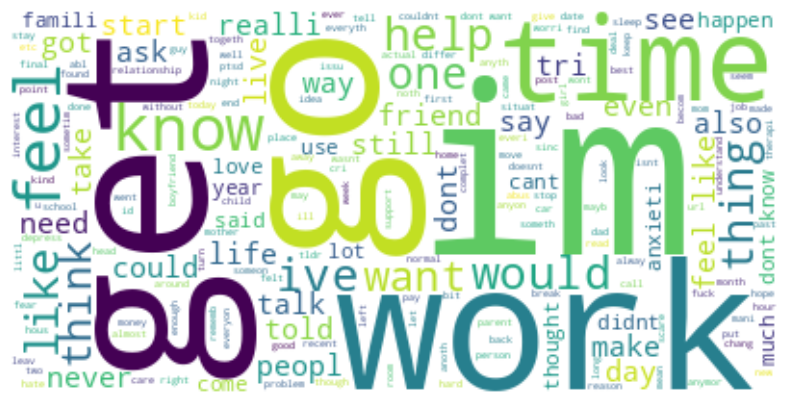

In [ ]:
def generate_word_cloud(text_series):
    text = " ".join(review for review in text_series)
    stop_words = set(stopwords.words('english'))  # Renamed variable
    wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Generate word cloud for the training data
generate_word_cloud(train_data['text'])


*Generating N-grams*

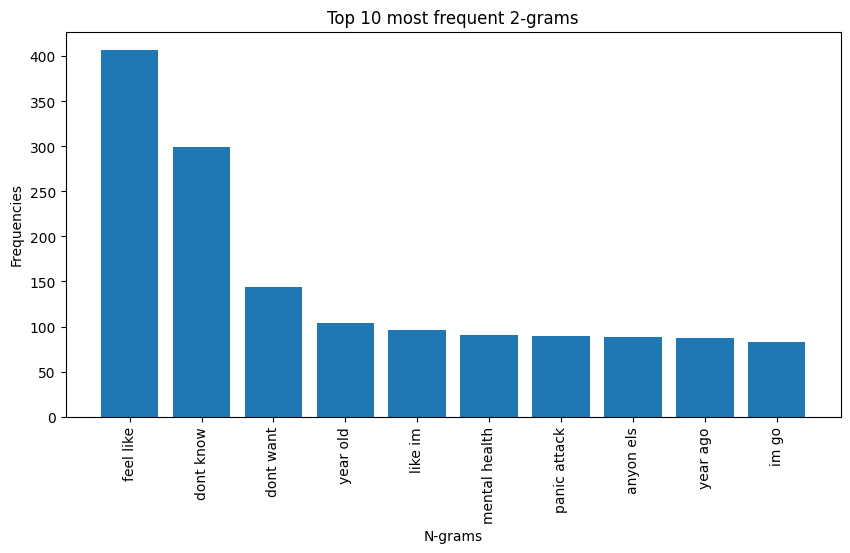

In [ ]:
def plot_top_ngrams(text_series, n=2, top_k=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text_series)
    bag_of_words = vec.transform(text_series)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]
    words, counts = zip(*words_freq)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title(f'Top {top_k} most frequent {n}-grams')
    plt.xticks(rotation=90)
    plt.show()

# Plot top bi-grams for the training data
plot_top_ngrams(train_data['text'], n=2)


*Generating POS Tags*

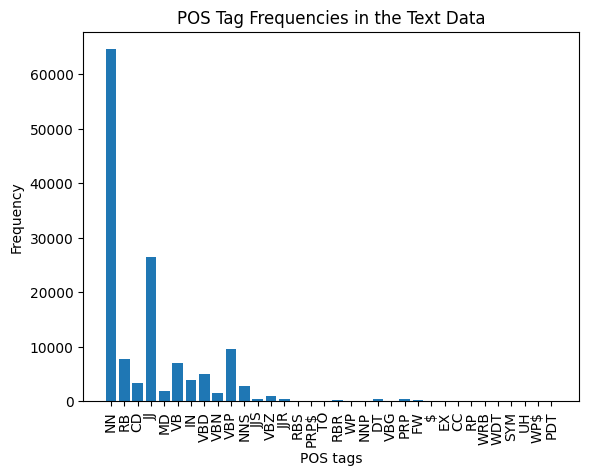

In [ ]:
def get_pos_tags(text_series):
    text = " ".join(text_series)
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    pos_counts = Counter(tag for word, tag in pos_tags)
    plt.bar(pos_counts.keys(), pos_counts.values())
    plt.xlabel('POS tags')
    plt.ylabel('Frequency')
    plt.title('POS Tag Frequencies in the Text Data')
    plt.xticks(rotation=90)
    plt.show()

# Get POS tags for the training data
get_pos_tags(train_data['text'])


**Topic Modeling Using BERTopic**

In [ ]:
pip install bertopic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 17.2 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [ ]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
data_path = '/content/processed_train_data.xlsx'
data = pd.read_excel(data_path)
documents = data['text'].tolist()


In [ ]:
# Instantiate BERTopic.
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model to your data
topics, probabilities = topic_model.fit_transform(documents)


2024-05-07 17:31:30,173 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/107 [00:00<?, ?it/s]

2024-05-07 17:33:56,583 - BERTopic - Embedding - Completed ✓
2024-05-07 17:33:56,589 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-07 17:34:24,703 - BERTopic - Dimensionality - Completed ✓
2024-05-07 17:34:24,705 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-07 17:34:25,902 - BERTopic - Cluster - Completed ✓
2024-05-07 17:34:25,926 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-07 17:34:26,270 - BERTopic - Representation - Completed ✓


In [ ]:
# Get an overview of the topics
topic_info = topic_model.get_topic_info()
print(topic_info)

# Print individual topics
for topic_num in range(len(topic_info) - 1):
    print(f"Topic {topic_num}:")
    print(topic_model.get_topic(topic_num))


    Topic  Count                              Name  \
0      -1   1192               -1_get_im_time_know   
1       0    144       0_ptsd_diagnos_im_flashback   
2       1    113          1_sleep_night_asleep_bed   
3       2     90   2_anxieti_attack_stomach_breath   
4       3     80  3_husband_wife_relationship_move   
..    ...    ...                               ...   
78     77     11      77_she_food_lose_hypersensit   
79     78     11   78_nametag_name_unhappi_contact   
80     79     11   79_passiv_account_money_aggress   
81     80     11          80_grace_anna_babi_birth   
82     81     11    81_flashback_gonna_today_night   

                                       Representation  \
0   [get, im, time, know, think, like, dont, feel,...   
1   [ptsd, diagnos, im, flashback, therapist, symp...   
2   [sleep, night, asleep, bed, fall, wake, hour, ...   
3   [anxieti, attack, stomach, breath, panic, pain...   
4   [husband, wife, relationship, move, togeth, ma...   
..       

In [ ]:
# Visualize topics
topic_model.visualize_topics()


In [ ]:
topic_model.visualize_barchart(top_n_topics=15)

**Model Training Using SVM**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, recall_score, accuracy_score


In [ ]:
# Load the datasets
train_data_path = '/content/processed_train_data.xlsx'
test_data_path = '/content/processed_test_data.xlsx'
validation_data_path = '/content/processed_validation_data.xlsx'

train_data = pd.read_excel(train_data_path)
test_data = pd.read_excel(test_data_path)
validation_data = pd.read_excel(validation_data_path)

# Extract features and labels
X_train = train_data['text']
y_train = train_data['labs']
X_test = test_data['text']
X_validation = validation_data['text']
y_validation = validation_data['labs']


*Setup the SVM Pipeline and TfidfVectorizer*

In [ ]:
# Set up the TfidfVectorizer and SVM Pipeline
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
svm_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', SVC(kernel='linear', probability=True))
])

*Train the Model and Evaluate on Validation Data*

In [ ]:
from sklearn.metrics import classification_report, recall_score, accuracy_score

# Train the model
svm_pipeline.fit(X_train, y_train)

# Predict on the training dataset
train_predictions = svm_pipeline.predict(X_train)

# Predict on the validation dataset
validation_predictions = svm_pipeline.predict(X_validation)

# Calculate and print the classification report and macro average recall for training dataset
print("Training Set:")
print(classification_report(y_train, train_predictions))
print("Training Set Macro Average Recall:", recall_score(y_train, train_predictions, average='macro'))

# Calculate and print the classification report and macro average recall for validation dataset
print("\nValidation Set:")
print(classification_report(y_validation, validation_predictions))
print("Validation Set Macro Average Recall:", recall_score(y_validation, validation_predictions, average='macro'))

# Calculate and print the accuracy for both datasets
print("\nTraining Set Accuracy:", accuracy_score(y_train, train_predictions))
print("Validation Set Accuracy:", accuracy_score(y_validation, validation_predictions))


Training Set:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1620
           1       0.95      0.97      0.96      1785

    accuracy                           0.96      3405
   macro avg       0.96      0.95      0.96      3405
weighted avg       0.96      0.96      0.96      3405

Training Set Macro Average Recall: 0.9545699761386035

Validation Set:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       540
           1       0.84      0.86      0.85       595

    accuracy                           0.84      1135
   macro avg       0.84      0.84      0.84      1135
weighted avg       0.84      0.84      0.84      1135

Validation Set Macro Average Recall: 0.8423747276688454

Training Set Accuracy: 0.955359765051395
Validation Set Accuracy: 0.8431718061674008


*Make Predictions on the Test Dataset*

In [ ]:
# Predict on the test dataset
test_predictions = svm_pipeline.predict(X_test)


test_data['Predictions'] = test_predictions
output_path = 'ttest_predictions_output.xlsx'
test_data.to_excel(output_path, index=False)